# **Feature Engineering**

## Objectives

* Create new features to improve model predictions.
* Transform and combine existing features.
* Explore the relationships between features and the target variable.

## Inputs

* Cleaned dataset: `outputs/datasets/collection/HousePricesRecords.csv`
* Data with handled missing values and correct data types.

## Outputs

* New dataset with engineered features: `outputs/datasets/feature_engineered/HousePricesFeatures.csv`
* Visualizations (if applicable): Charts showing feature relationships and distributions.


___

# Change working directory

We need to change the working directory from its current folder to its parent folder
* We access the current directory with os.getcwd()

In [1]:
import os
current_dir = os.getcwd()
current_dir

'/workspace/Heritage-Housing-Issues/jupyter_notebooks'

We want to make the parent of the current directory the new current directory
* os.path.dirname() gets the parent directory
* os.chir() defines the new current directory

In [2]:
os.chdir(os.path.dirname(current_dir))
print("You set a new current directory")

You set a new current directory


Confirm the new current directory

In [3]:
current_dir = os.getcwd()
current_dir

'/workspace/Heritage-Housing-Issues'

___

## Load data

In [1]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from feature_engine.selection import SmartCorrelatedSelection
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import Pipeline

df = pd.read_csv("outputs/datasets/collection/HousePricesCleaned.csv")
print(df[['2ndFlrSF', 'BedroomAbvGr', 'SalePrice']].head())

   2ndFlrSF  BedroomAbvGr  SalePrice
0     854.0           3.0   208500.0
1       0.0           3.0   181500.0
2     866.0           3.0   223500.0
3       0.0           3.0   140000.0
4       0.0           4.0   250000.0


In [2]:
df.dtypes

1stFlrSF         float64
2ndFlrSF         float64
BedroomAbvGr     float64
BsmtExposure      object
BsmtFinSF1       float64
BsmtFinType1      object
BsmtUnfSF        float64
EnclosedPorch    float64
GarageArea       float64
GarageFinish      object
GarageYrBlt      float64
GrLivArea        float64
KitchenQual       object
LotArea          float64
LotFrontage      float64
MasVnrArea       float64
OpenPorchSF      float64
OverallCond        int64
OverallQual        int64
TotalBsmtSF      float64
WoodDeckSF       float64
YearBuilt          int64
YearRemodAdd       int64
SalePrice        float64
dtype: object

In [3]:
# Categorical and numerical columns
categorical_columns = ['BsmtExposure', 'BsmtFinType1', 'GarageFinish', 'KitchenQual']
numerical_columns = ['2ndFlrSF', 'BedroomAbvGr', 'BsmtFinSF1', 'GarageArea', 'GrLivArea']
X_numerical = df[numerical_columns]

In [4]:
# Perform one-hot encoding on categorical features
X_categorical = df[categorical_columns]
X_categorical_encoded = pd.get_dummies(X_categorical)

# Convert boolean columns (created by get_dummies) to integers (0 and 1)
X_categorical_encoded = X_categorical_encoded.astype(int)

# Concatenate numerical and encoded categorical features
X_combined = pd.concat([X_numerical, X_categorical_encoded], axis=1)

# Create a pipeline for scaling the numerical data
pipeline = Pipeline([
    ('scaler', StandardScaler())
])

try:
    # Apply the pipeline to scale numerical features
    X_combined[numerical_columns] = pipeline.fit_transform(X_combined[numerical_columns])

    # Add SalePrice to the transformed DataFrame
    X_combined['SalePrice'] = df['SalePrice']

    # Convert boolean columns to integers
    bool_columns = X_combined.select_dtypes(include=['bool']).columns
    X_combined[bool_columns] = X_combined[bool_columns].astype(int)

    # Display information about the transformed dataset
    print("Transformed dataset size:", X_combined.shape)
    print(X_combined.head())

    # Confirm the data types after all transformations
    print(X_combined.dtypes)

    # Export the transformed dataset to CSV
    X_combined.to_csv("outputs/datasets/collection/HousePricesFeatures.csv", index=False)
    print("Exported the transformed dataset successfully!")

except Exception as e:
    print("Error during pipeline execution:", e)


Transformed dataset size: (1460, 23)
   2ndFlrSF  BedroomAbvGr  BsmtFinSF1  GarageArea  GrLivArea  BsmtExposure_Av  \
0  1.213595      0.153895    0.575425    0.351000   0.370333                0   
1 -0.756746      0.153895    1.171992   -0.060731  -0.482512                0   
2  1.241281      0.153895    0.092907    0.631726   0.515013                0   
3 -0.756746      0.153895   -0.499274    0.790804   0.383659                0   
4 -0.756746      1.416182    0.463568    1.698485   1.299326                1   

   BsmtExposure_Gd  BsmtExposure_Mn  BsmtExposure_No  BsmtFinType1_ALQ  ...  \
0                0                0                1                 0  ...   
1                1                0                0                 1  ...   
2                0                1                0                 0  ...   
3                0                0                1                 1  ...   
4                0                0                0                 0  ...   

 

Visualize the distribution of 2ndFlrSF to see how many houses have a second floor and its size


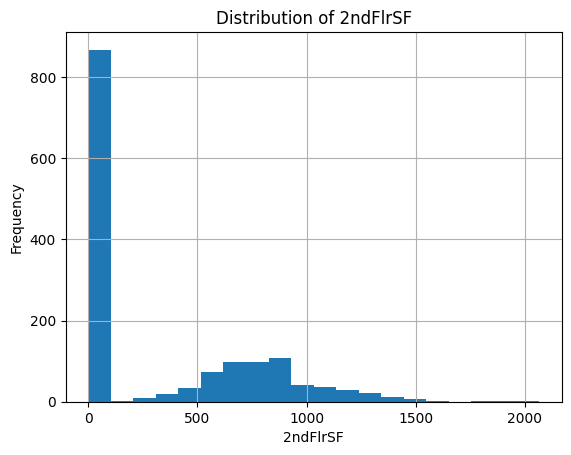

In [5]:
import matplotlib.pyplot as plt
df['2ndFlrSF'].hist(bins=20)
plt.title('Distribution of 2ndFlrSF')
plt.xlabel('2ndFlrSF')
plt.ylabel('Frequency')
plt.show()


In [6]:
print("Missing values in numerical columns:")
print(df[numerical_columns].isnull().sum())

Missing values in numerical columns:
2ndFlrSF        0
BedroomAbvGr    0
BsmtFinSF1      0
GarageArea      0
GrLivArea       0
dtype: int64


In [7]:
print("DataFrame shape after operation:", df.shape)
print("DataFrame columns after operation:", df.columns.tolist())

DataFrame shape after operation: (1460, 24)
DataFrame columns after operation: ['1stFlrSF', '2ndFlrSF', 'BedroomAbvGr', 'BsmtExposure', 'BsmtFinSF1', 'BsmtFinType1', 'BsmtUnfSF', 'EnclosedPorch', 'GarageArea', 'GarageFinish', 'GarageYrBlt', 'GrLivArea', 'KitchenQual', 'LotArea', 'LotFrontage', 'MasVnrArea', 'OpenPorchSF', 'OverallCond', 'OverallQual', 'TotalBsmtSF', 'WoodDeckSF', 'YearBuilt', 'YearRemodAdd', 'SalePrice']


Show correlation matrix for numeric features

In [8]:
correlation_matrix = df.select_dtypes(include=['float64', 'int64']).corr()

Create a heatmap to visualize the correlation matrix

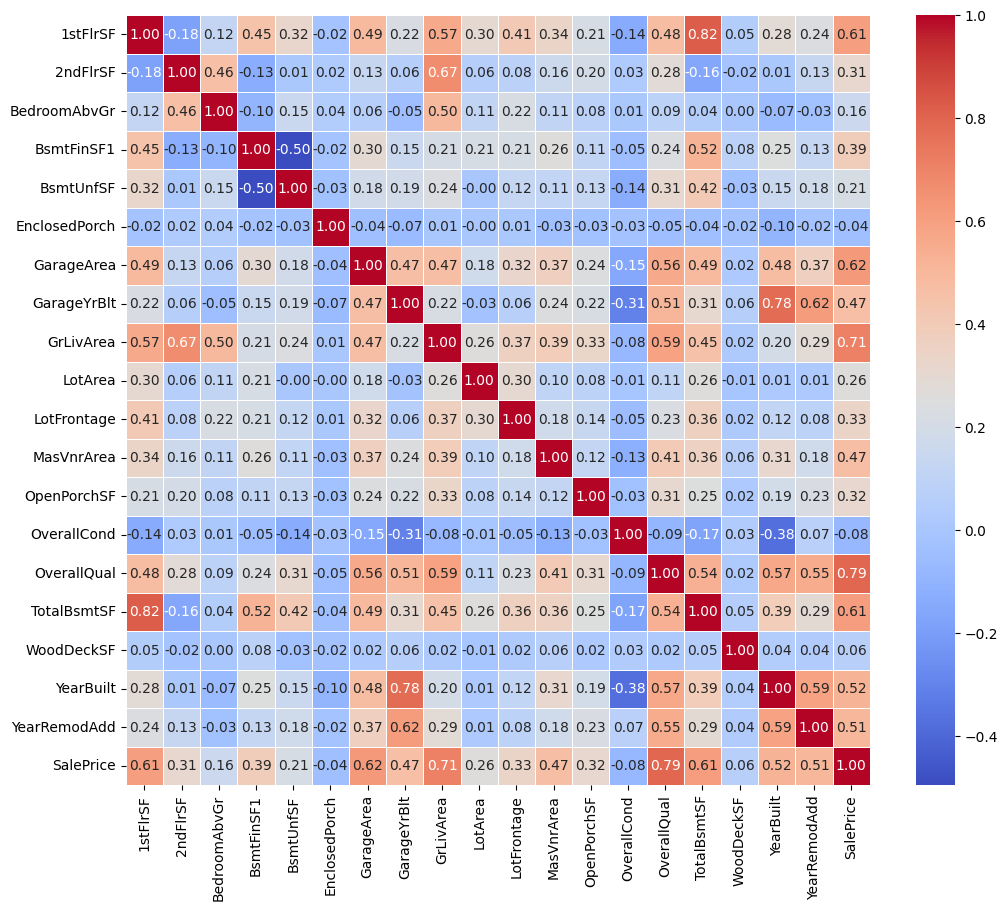

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.show()


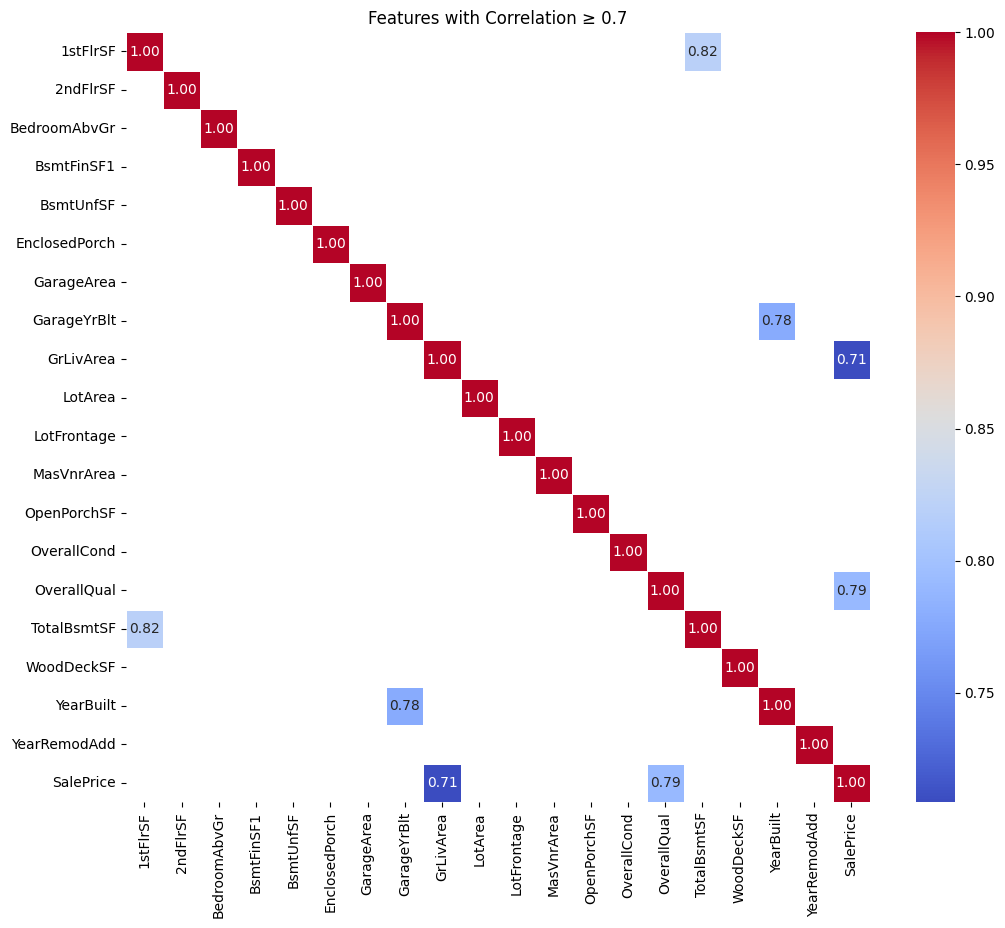

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Threshold for high correlation
threshold = 0.7

# Filter correlation matrix to keep values >= 0.8
high_correlation = correlation_matrix.applymap(lambda x: x if x >= threshold else np.nan)

# Plot the filtered correlation matrix
plt.figure(figsize=(12, 10))
sns.heatmap(high_correlation, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5, cbar=True)
plt.title("Features with Correlation ≥ 0.7")
plt.show()


In [12]:
# Filter high correlation features related to SalePrice
high_corr_with_target = correlation_matrix['SalePrice'][correlation_matrix['SalePrice'] >= threshold]
print("Features with high correlation to SalePrice:", high_corr_with_target)

Features with high correlation to SalePrice: GrLivArea      0.708624
OverallQual    0.790982
SalePrice      1.000000
Name: SalePrice, dtype: float64


### Hypothesis 1 Confirmed
The scatter plots and correlation analysis show a positive relationship between the total area of the house and its sale price, confirming our initial hypothesis that bigger houses tend to have higher sale prices.

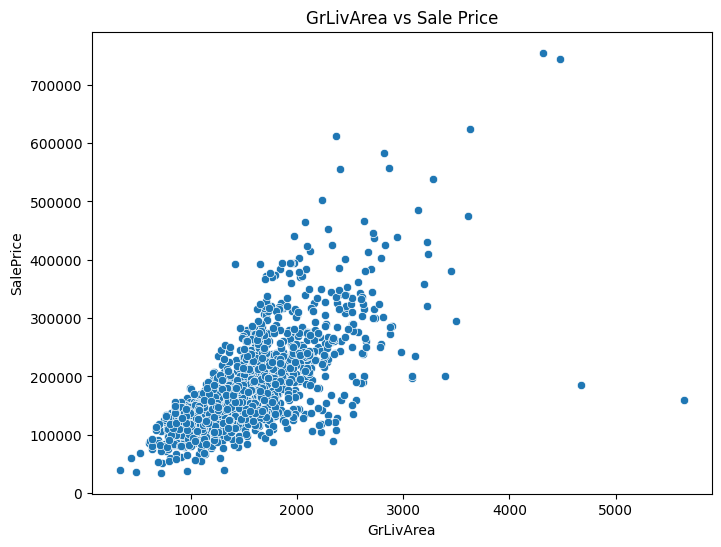

In [13]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='GrLivArea', y='SalePrice', data=df)
plt.xlabel('GrLivArea')
plt.ylabel('SalePrice')
plt.title('GrLivArea vs Sale Price')
plt.show()

### Hypothesis 2 Confirmed
* The scatter plot and correlation analysis show a strong positive link between OverallQual and SalePrice. With a correlation of 0.79, higher quality homes tend to sell for more. This confirms that home quality affects its sale price.

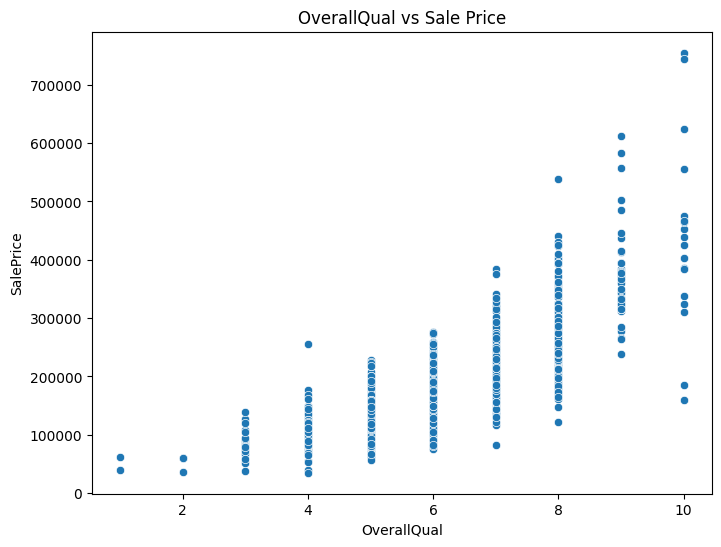

In [14]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='OverallQual', y='SalePrice', data=df)
plt.xlabel('OverallQual')
plt.ylabel('SalePrice')
plt.title('OverallQual vs Sale Price')
plt.show()

### Hypothesis 3 Confirmed
The scatter plot and correlation analysis show a positive relationship between 'GarageArea' and 'SalePrice'. This confirms the hypothesis that houses with bigger garages tend to sell for higher prices.

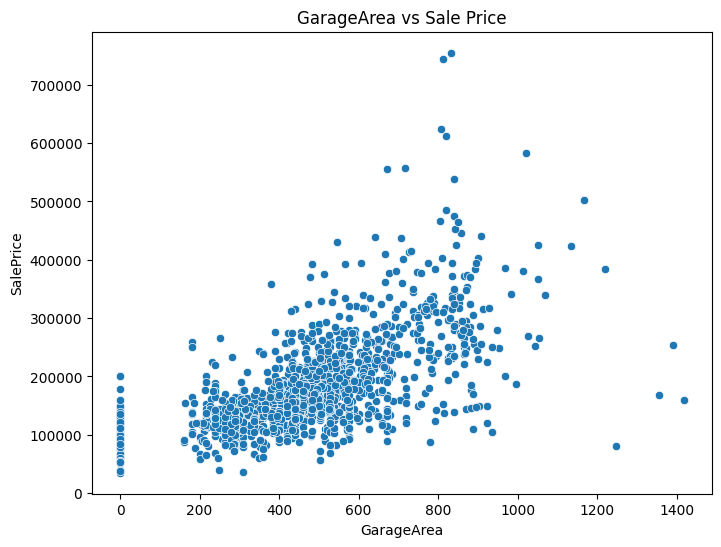

In [15]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='GarageArea', y='SalePrice', data=df)
plt.xlabel('GarageArea')
plt.ylabel('SalePrice')
plt.title('GarageArea vs Sale Price')
plt.show()

In [16]:
print(X_combined.dtypes)


2ndFlrSF            float64
BedroomAbvGr        float64
BsmtFinSF1          float64
GarageArea          float64
GrLivArea           float64
BsmtExposure_Av       int64
BsmtExposure_Gd       int64
BsmtExposure_Mn       int64
BsmtExposure_No       int64
BsmtFinType1_ALQ      int64
BsmtFinType1_BLQ      int64
BsmtFinType1_GLQ      int64
BsmtFinType1_LwQ      int64
BsmtFinType1_Rec      int64
BsmtFinType1_Unf      int64
GarageFinish_Fin      int64
GarageFinish_RFn      int64
GarageFinish_Unf      int64
KitchenQual_Ex        int64
KitchenQual_Fa        int64
KitchenQual_Gd        int64
KitchenQual_TA        int64
SalePrice           float64
dtype: object


Print the number of unique values in each column

In [17]:
print(df.nunique())
print(df['SalePrice'].unique())

1stFlrSF          753
2ndFlrSF          401
BedroomAbvGr        8
BsmtExposure        4
BsmtFinSF1        637
BsmtFinType1        6
BsmtUnfSF         780
EnclosedPorch      19
GarageArea        441
GarageFinish        3
GarageYrBlt        97
GrLivArea         861
KitchenQual         4
LotArea          1073
LotFrontage       110
MasVnrArea        327
OpenPorchSF       202
OverallCond         9
OverallQual        10
TotalBsmtSF       721
WoodDeckSF         58
YearBuilt         112
YearRemodAdd       61
SalePrice         663
dtype: int64
[208500. 181500. 223500. 140000. 250000. 143000. 307000. 200000. 129900.
 118000. 129500. 345000. 144000. 279500. 157000. 132000. 149000.  90000.
 159000. 139000. 325300. 139400. 230000. 154000. 256300. 134800. 306000.
 207500.  68500.  40000. 149350. 179900. 165500. 277500. 309000. 145000.
 153000. 109000.  82000. 160000. 170000. 130250. 141000. 319900. 239686.
 249700. 113000. 127000. 177000. 114500. 110000. 385000. 130000. 180500.
 172500. 196500. 4387

___

## Push files to repo

In [18]:
X_combined.to_csv("outputs/datasets/collection/HousePricesFeatures.csv", index=False)
print("Exported the transformed dataset successfully!")

Exported the transformed dataset successfully!
